In [94]:
# Extracting the dataset
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Intel_Image_Classification/archive.zip")
zip_ref.extractall()
zip_ref.close()

In [2]:
import tensorflow as tf

IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

In [3]:
# Extract data
train_dir = "seg_train/seg_train/"
test_dir = "seg_test/seg_test/"

import tensorflow as tf
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMAGE_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")

len(train_data), len(test_data)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


(439, 94)

In [4]:
train_data.class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [5]:
import os

os.listdir(path="seg_train/seg_train/")

['forest', 'buildings', 'street', 'mountain', 'glacier', 'sea']

In [6]:
for images, labels in train_data.take(count=1):
  print(images[0].shape, labels[0])

(150, 150, 3) tf.Tensor([0. 1. 0. 0. 0. 0.], shape=(6,), dtype=float32)


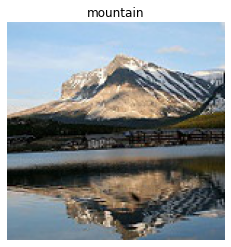

In [7]:
# Visualize image

# Get class names
import os
class_names = sorted(os.listdir(path="seg_train/seg_train"))

def view_random_image(directory, class_names):
  import random
  class_chosen_index = random.randint(0, len(class_names)-1)
  random_img_path = random.choice(os.listdir(directory + class_names[class_chosen_index]))
  
  # Get the image
  import matplotlib.image as mpimg
  import matplotlib.pyplot as plt


  random_img = mpimg.imread(directory + class_names[class_chosen_index] + "/" + random_img_path)
  plt.figure()
  plt.imshow(random_img)
  plt.axis("off")
  plt.title(class_names[class_chosen_index])
  return random_img

img = view_random_image(train_dir, class_names)

In [8]:
# Size of the img
img.shape

(150, 150, 3)

In [208]:
# Build the model from scratch

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=IMAGE_SIZE + (3,)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation="softmax")
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 146, 146, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 10)        910       
                                                                 
 conv2d_9 (Conv2D)           (None, 69, 69, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 34, 34, 10)       0         
 2D)                                                  

In [210]:
# Create a ModelCheckpoint callback

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/Intel_Image_Classification/model_1", 
                                                save_best_only=True)

In [211]:
# Fitting the model
history = model.fit(train_data,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    callbacks=[checkpoint])

Epoch 1/5
439/439 [==============================] - ETA: 0s - loss: 1.2584 - accuracy: 0.5674

439/439 [==============================] - 14s 31ms/step - loss: 1.2584 - accuracy: 0.5674 - val_loss: 0.9069 - val_accuracy: 0.6530
Epoch 2/5
439/439 [==============================] - ETA: 0s - loss: 0.8011 - accuracy: 0.6991

439/439 [==============================] - 19s 44ms/step - loss: 0.8011 - accuracy: 0.6991 - val_loss: 0.7482 - val_accuracy: 0.7277
Epoch 3/5
439/439 [==============================] - ETA: 0s - loss: 0.7079 - accuracy: 0.7401

439/439 [==============================] - 14s 32ms/step - loss: 0.7079 - accuracy: 0.7401 - val_loss: 0.7329 - val_accuracy: 0.7303
Epoch 4/5
439/439 [==============================] - ETA: 0s - loss: 0.6221 - accuracy: 0.7716

439/439 [==============================] - 67s 152ms/step - loss: 0.6221 - accuracy: 0.7716 - val_loss: 0.6221 - val_accuracy: 0.7680
Epoch 5/5
439/439 [==============================] - 12s 28ms/step - loss: 0.5744 - accuracy: 0.7944 - val_loss: 0.6310 - val_accuracy: 0.7660


In [234]:
model.predict(test_data)

94/94 [==============================] - 2s 19ms/step


array([[1.85148368e-04, 1.28634963e-06, 2.02167537e-02, 4.14893264e-03,
        9.75333095e-01, 1.14810355e-04],
       [2.39687157e-03, 1.69143095e-04, 8.93257484e-02, 4.96619456e-02,
        8.31434846e-01, 2.70114448e-02],
       [2.34529115e-02, 1.33960366e-01, 1.50327315e-03, 9.16405479e-05,
        1.05428288e-03, 8.39937508e-01],
       ...,
       [3.43683735e-02, 8.34499369e-04, 2.18711551e-02, 6.07700692e-03,
        8.74115169e-01, 6.27337471e-02],
       [1.01959750e-01, 8.74266252e-02, 2.99888086e-02, 1.55864395e-02,
        1.46112321e-02, 7.50427186e-01],
       [5.59619427e-01, 2.24745076e-04, 1.40768270e-06, 1.30747777e-08,
        8.79931031e-06, 4.40145612e-01]], dtype=float32)

In [9]:
# Using transfer learning without augmentation

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

# EfficientNetB0
base_model_1 = tf.keras.applications.EfficientNetB2(include_top=False)
base_model_1.trainable = False
x = base_model_1(inputs)

# Add pooling
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add dense layer
outputs = tf.keras.layers.Dense(6, activation="softmax")(x)

# Model
model_1 = tf.keras.Model(inputs, outputs, name="EfficientNet_without_augmentation")

# Compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_1 = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/Intel_Image_Classification/" + model_1.name)

model_1.summary()

Model: "EfficientNet_without_augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 efficientnetb2 (Functional)  (None, None, None, 1408)  7768569  
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 6)                 8454      
                                                                 
Total params: 7,777,023
Trainable params: 8,454
Non-trainable params: 7,768,569
_________________________________________________________________


In [11]:
history_1 = model_1.fit(train_data,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    callbacks=[checkpoint_1])

Epoch 1/5
439/439 [==============================] - ETA: 0s - loss: 0.3659 - accuracy: 0.8786

439/439 [==============================] - 93s 184ms/step - loss: 0.3659 - accuracy: 0.8786 - val_loss: 0.2458 - val_accuracy: 0.9130
Epoch 2/5
438/439 [============================>.] - ETA: 0s - loss: 0.2287 - accuracy: 0.9177

439/439 [==============================] - 80s 181ms/step - loss: 0.2285 - accuracy: 0.9178 - val_loss: 0.2220 - val_accuracy: 0.9203
Epoch 3/5
439/439 [==============================] - ETA: 0s - loss: 0.2095 - accuracy: 0.9240

439/439 [==============================] - 105s 238ms/step - loss: 0.2095 - accuracy: 0.9240 - val_loss: 0.2182 - val_accuracy: 0.9197
Epoch 4/5
439/439 [==============================] - ETA: 0s - loss: 0.1955 - accuracy: 0.9300

439/439 [==============================] - 79s 180ms/step - loss: 0.1955 - accuracy: 0.9300 - val_loss: 0.2155 - val_accuracy: 0.9207
Epoch 5/5
439/439 [==============================] - ETA: 0s - loss: 0.1831 - accuracy: 0.9335

439/439 [==============================] - 78s 178ms/step - loss: 0.1831 - accuracy: 0.9335 - val_loss: 0.2160 - val_accuracy: 0.9200


In [12]:


def plot_loss_curves(history):
  import matplotlib.pyplot as plt
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [112]:
def load_and_prep_image(filename, img_shape=150):
    """
    Reads an image from filename, turns it into a tensor and
    reshapes it to (img_shape, img_shape, color_channels)
    """
    # Read in the image
    img = tf.io.read_file(filename)

    # Decode the read file into tensor
    img = tf.image.decode_image(img)

    # Reshape the image
    img = tf.image.resize(img, [img_shape, img_shape])

    # Rescale the image
    img = img/255.

    return img

In [55]:
class_names

['forest', 'buildings', 'street', 'mountain', 'glacier', 'sea']

In [15]:

def predict_and_plot(model, filepath, class_names=class_names):
  import numpy as np
  import tensorflow as tf

  img = tf.io.read_file(filepath)

  # Decode the read file into tensor
  img = tf.image.decode_image(img)

  # Reshape the image
  img = tf.image.resize(img, [150, 150])

  prediction = class_names[tf.argmax(model.predict(tf.expand_dims(img, axis=0))[0])]

  import matplotlib.pyplot as plt
  plt.imshow(img/255.)
  plt.title(prediction)

  return prediction
  

1/1 [==============================] - 0s 28ms/step


'street'

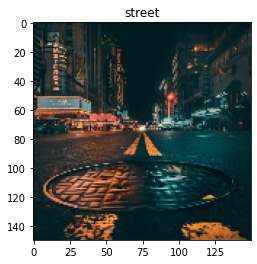

In [19]:

filepath = "/content/drive/MyDrive/Intel_Image_Classification/Prediction_images/streets.jpg"
predict_and_plot(model=model_1, filepath=filepath)

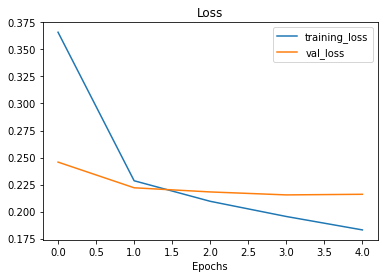

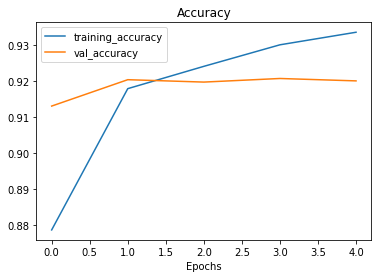

In [21]:
plot_loss_curves(history_1)

In [22]:
# Fine Tuning the model
base_model_1.trainable=True
for layer in base_model_1.layers[:-10]:
  layer.trainable=False

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.summary()

Model: "EfficientNet_without_augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 efficientnetb2 (Functional)  (None, None, None, 1408)  7768569  
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 6)                 8454      
                                                                 
Total params: 7,777,023
Trainable params: 1,624,926
Non-trainable params: 6,152,097
_________________________________________________________________


In [23]:
checkpoint_2 = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Intel_Image_Classification/" + model_1.name + "_fine_tuned")

In [24]:
history_1_fine_tuned = model_1.fit(train_data,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    callbacks=[checkpoint_2])

Epoch 1/5
439/439 [==============================] - ETA: 0s - loss: 0.3000 - accuracy: 0.9014

439/439 [==============================] - 90s 184ms/step - loss: 0.3000 - accuracy: 0.9014 - val_loss: 0.2178 - val_accuracy: 0.9287
Epoch 2/5
438/439 [============================>.] - ETA: 0s - loss: 0.1885 - accuracy: 0.9307

439/439 [==============================] - 81s 185ms/step - loss: 0.1890 - accuracy: 0.9306 - val_loss: 0.2217 - val_accuracy: 0.9263
Epoch 3/5
438/439 [============================>.] - ETA: 0s - loss: 0.1537 - accuracy: 0.9436

439/439 [==============================] - 78s 179ms/step - loss: 0.1538 - accuracy: 0.9436 - val_loss: 0.2237 - val_accuracy: 0.9250
Epoch 4/5
438/439 [============================>.] - ETA: 0s - loss: 0.1244 - accuracy: 0.9532

439/439 [==============================] - 80s 182ms/step - loss: 0.1243 - accuracy: 0.9533 - val_loss: 0.4140 - val_accuracy: 0.8957
Epoch 5/5
439/439 [==============================] - ETA: 0s - loss: 0.1172 - accuracy: 0.9568

439/439 [==============================] - 80s 183ms/step - loss: 0.1172 - accuracy: 0.9568 - val_loss: 0.2281 - val_accuracy: 0.9250


In [25]:
model_1.save("/content/drive/MyDrive/Intel_Image_Classification/Model_without_augmentation")